In [1]:
!pip install pyarrow==15.0.0
!pip install numpy==1.24.3
!pip install torch
!pip install -U accelerate
!pip install matplotlib
!pip install scikit-learn
!pip install torchmetrics
!pip install tqdm
!pip install fsspec
!pip install transformers[torch]
!pip install --upgrade pandas
!pip install --upgrade datasets



  Using cached pyarrow-15.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached pyarrow-15.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (38.3 MB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Using cached accelerate-1.2.1-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.2.1-py3-none-any.whl (336 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_

In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import load_dataset, Dataset, Features, Value, concatenate_datasets
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
import torch
from sklearn.metrics import accuracy_score, f1_score  # For metrics
from tqdm.auto import tqdm  # For progress bars

Initializing tokenizer for bert-base-multilingual-cased...


/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Processing Train Dataset using tokenizer from bert-base-multilingual-cased...
Tokenizing the data in batches . . .
Processing Validation Dataset . . .
Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Fine-tuning bert-base-multilingual-cased...


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Epoch,Training Loss,Validation Loss
0,0.835100,0.680515
1,0.602300,0.655154
2,0.494600,0.652204
3,0.416200,0.678685
4,0.365600,0.698700


Initializing tokenizer for xlm-roberta-base...


/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Processing Train Dataset using tokenizer from xlm-roberta-base...
Tokenizing the data in batches . . .
Processing Validation Dataset . . .
Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Fine-tuning xlm-roberta-base...


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
0,0.764800,0.595855
1,0.527900,0.567424
2,0.446900,0.600780
3,0.382000,0.618724
4,0.341900,0.623254


Initializing tokenizer for distilbert-base-multilingual-cased...


/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Processing Train Dataset using tokenizer from distilbert-base-multilingual-cased...
Tokenizing the data in batches . . .
Processing Validation Dataset . . .
Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Fine-tuning distilbert-base-multilingual-cased...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
0,0.899400,0.737559
1,0.665400,0.674767
2,0.567800,0.671859
3,0.504300,0.677752
4,0.463800,0.688985


Evaluation Model Performance . . .
Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


Tokenizing the data in batches . . .
Dataset Features: {'text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}
Unique labels in test data: tensor([0, 1, 2, 3])


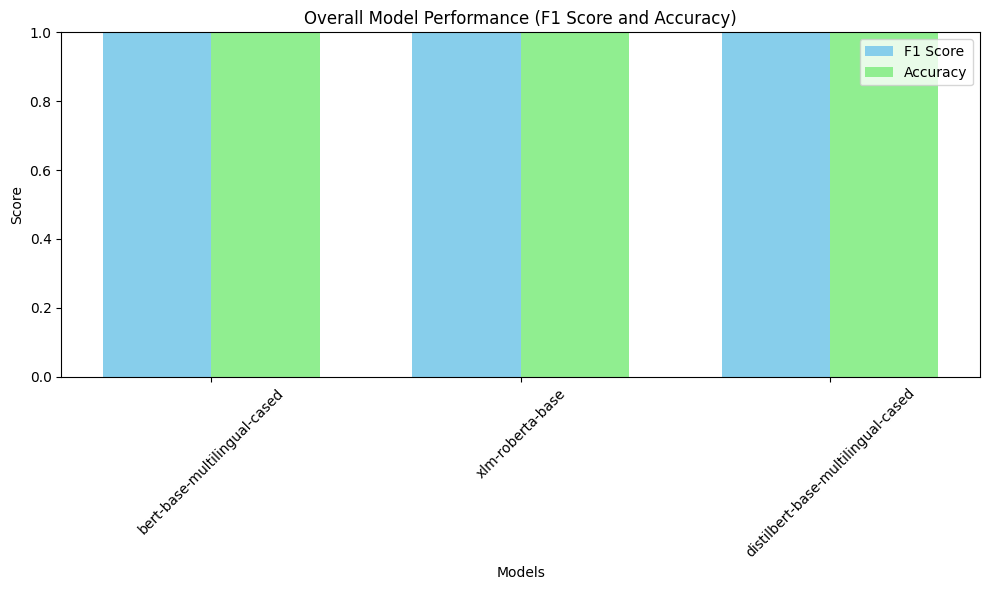

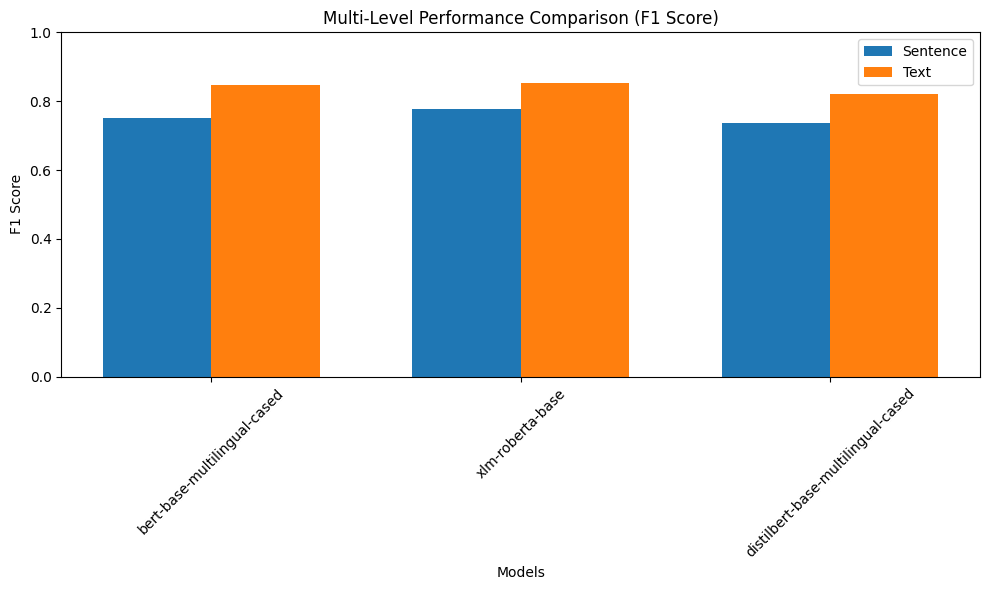

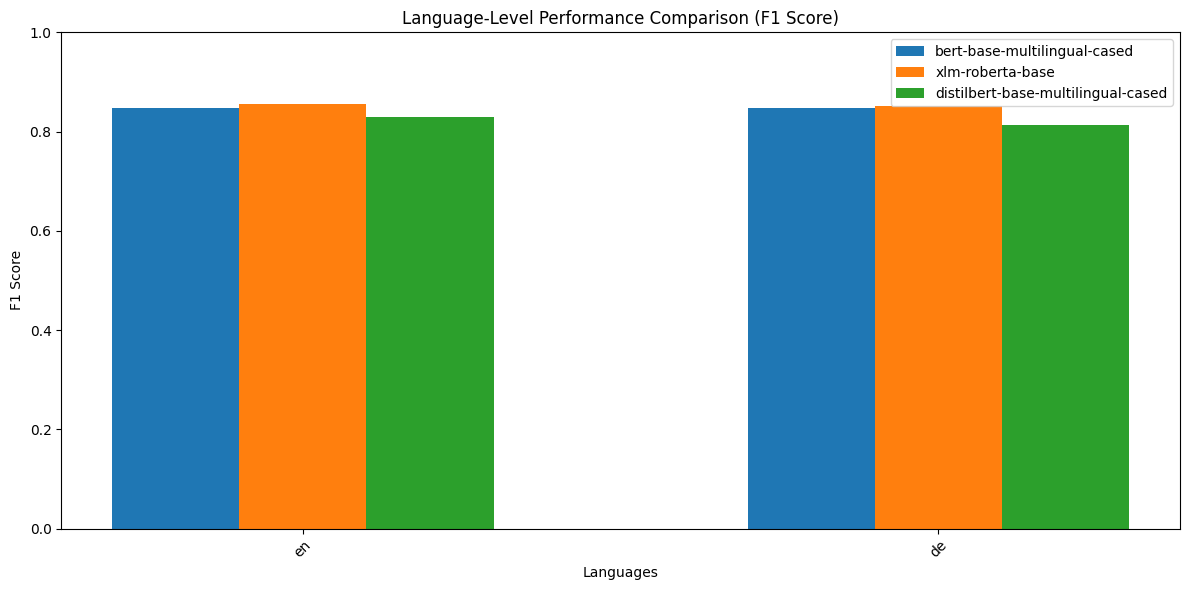

In [4]:

# Categorization Function
def categorize_files(directory):
    categorized = {
        "train": [],
        "dev": [],
        "test": {"sentence": defaultdict(list), "text": defaultdict(list)}
    }
    split_patterns = {"train": re.compile(r"\.train\."), "dev": re.compile(r"\.dev\."), "test": re.compile(r"\.test\.")}
    level_patterns = {"sentence": re.compile(r"sentence"), "text": re.compile(r"text")}

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            for split, split_pattern in split_patterns.items():
                if split_pattern.search(filename):
                    if split == "test":
                        for level, level_pattern in level_patterns.items():
                            if level_pattern.search(filename):
                                lang_match = re.search(r"\.(\w{2,}-?\w{0,2})\.txt$", filename)
                                if lang_match:
                                    lang = lang_match.group(1)
                                    categorized[split][level][lang].append(filepath)
                                break
                    else:
                        categorized[split].append(filepath)
                    break
    return categorized


# Refactored Data Processing Function
def process_data(filepaths, tokenizer, label_map):
    """
    Process data from text files into a pandas DataFrame, tokenize, and map labels.
    """
    data = []
    for filepath in filepaths:
        text = ""
        label = None

        with open(filepath, "r", encoding="utf-8") as file:
            for line in file:
                line = line.strip()
                for word in line.split():
                    if word.startswith("__label__"):
                        label = word.replace("__label__", "").strip()
                        if text:  # Avoid adding empty texts
                            data.append({"text": text, "label": label})
                        text = ""
                    else:
                        text = text.strip() + " " + word

    # Convert to pandas DataFrame
    df = pd.DataFrame(data)

    batch_size = 50000  # Adjust batch size as needed
    max_length=128

    print("Tokenizing the data in batches . . .")

    # Tokenize and process in batches directly to reduce memory overhead
    all_data = []
    for i in range(0, len(df), batch_size):
        batch_df = df.iloc[i:i + batch_size].copy(deep=True)
        encodings = tokenizer(batch_df["text"].tolist(), truncation=True, max_length=max_length, padding='max_length', return_tensors="pt")

        # Add tokenized results and labels directly
        batch_df["input_ids"] = encodings["input_ids"].tolist()
        batch_df["attention_mask"] = encodings["attention_mask"].tolist()
        
        # Map labels to integers
        batch_df["labels"] = batch_df["label"].apply(lambda x: label_map.get(x, -1)).astype("int64")

        # Check if any labels are lists
        if batch_df["labels"].apply(lambda x: isinstance(x, list)).any():
            print("Warning: Some labels are lists. Flattening them.")
            batch_df["labels"] = batch_df["labels"].apply(lambda x: x[0] if isinstance(x, list) else x)

        # Ensure that labels are integers
        if batch_df["labels"].dtype != 'int64':
            print("Warning: Labels are not integers, converting.")
            batch_df["labels"] = batch_df["labels"].apply(lambda x: int(x) if isinstance(x, str) else x)

        # Remove the original label column if it exists
        if "label" in batch_df.columns:
            batch_df = batch_df.drop(columns=["label"])

        all_data.append(Dataset.from_pandas(batch_df))  # Convert each batch to a Dataset

    combined_dataset = concatenate_datasets(all_data)

    # Exclude text from the training format but retain it in the dataset
    combined_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    return combined_dataset

def fine_tune_model(model_name, train_dataset, dev_dataset):
    """
    Fine-tune a pre-trained model on the train and dev datasets.
    """
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU if available

    early_stopping = EarlyStoppingCallback(early_stopping_patience=3)
    
    training_args = TrainingArguments(
        output_dir=f"./{model_name}-fine-tuned",
        eval_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=5,
        per_device_train_batch_size=128,
        per_device_eval_batch_size=128,
        gradient_accumulation_steps=8,
        fp16=True,
        weight_decay=0.01,
        logging_dir="./logs",
        logging_steps=100,
        save_total_limit=2,
        load_best_model_at_end=True,
        callbacks=[early_stopping],
        metric_for_best_model="eval_loss",
        run_name=f"./{model_name}-fine_tuning_run",
    )

    trainer = Trainer(
        model=model,
        args=training_args,    
        train_dataset=train_dataset,
        eval_dataset=dev_dataset,
    )

    trainer.train()

    return model

# Model Evaluation Function
def evaluate_model(model_name, model, test_data):
    """
    Evaluate a model on the test dataset.
    """
    def compute_metrics(pred):
        preds = pred.predictions.argmax(-1)
        labels = pred.label_ids
        acc = accuracy_score(labels, preds)
        f1 = f1_score(labels, preds, average="weighted")
        return {"accuracy": acc, "f1": f1}

    # Now, print the features to check
    print(f"Dataset Features: {test_data.features}")
    print("Unique labels in test data:", test_data["labels"].unique())

    trainer = Trainer(
        model=model,
        compute_metrics=compute_metrics
    )
    results = trainer.evaluate(test_data)
    return results["eval_accuracy"], results["eval_f1"]


# Visualization Functions
def plot_overall_performance(results):
    models = list(results.keys())
    f1_scores = [metrics["f1"] for metrics in results.values()]
    accuracies = [metrics["accuracy"] for metrics in results.values()]  # Extract accuracy

    x = range(len(models))  # The x locations for the groups
    width = 0.35  # Width of the bars

    plt.figure(figsize=(10, 6))
    
    # Plot F1 scores
    plt.bar(x, f1_scores, width, label='F1 Score', color='skyblue')
    
    # Plot accuracies next to F1 scores
    plt.bar([p + width for p in x], accuracies, width, label='Accuracy', color='lightgreen')

    plt.title("Overall Model Performance (F1 Score and Accuracy)")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.ylim(0, 1)
    plt.xticks([p + width / 2 for p in x], models, rotation=45)  # Center the x-ticks
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_multilevel_performance(results):
    levels = ["sentence", "text"]
    models = list(results.keys())

    x = range(len(models))
    width = 0.35

    plt.figure(figsize=(10, 6))
    for i, level in enumerate(levels):
        f1_scores = [results[model][level] for model in models]
        plt.bar([pos + i * (width) for pos in x], f1_scores, width, label=level.capitalize())

    plt.title("Multi-Level Performance Comparison (F1 Score)")
    plt.ylabel("F1 Score")
    plt.xlabel("Models")
    plt.ylim(0, 1)
    plt.xticks([pos + (width) / 2 for pos in x], models, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_language_performance(results):
    languages = list(next(iter(results.values())).keys())
    models = list(results.keys())

    x = range(len(languages))
    width = 0.2

    plt.figure(figsize=(12, 6))
    for i, model in enumerate(models):
        f1_scores = [results[model][lang]["f1"] for lang in languages]
        plt.bar([pos + i * (width) for pos in x], f1_scores, width, label=model)

    plt.title("Language-Level Performance Comparison (F1 Score)")
    plt.ylabel("F1 Score")
    plt.xlabel("Languages")
    plt.ylim(0, 1)
    plt.xticks([pos + (len(models) - 1) * (width) / 2 for pos in x], languages, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main Function
def main(directory, model_names):
    # Step 1: Categorize files
    categorized_files = categorize_files(directory)

    # Step 2: Define the label map
    label_map = {
        "z_minus_m": 0,
        "z_plus_m": 1,
        "z_amb": 2,
        "z_zero": 3,
        "meta_minus_m": 0,
        "meta_plus_m": 1,
        "meta_zero": 3,
        "meta_amb": 2
    }

        # Step 3 and 4: Process train and dev datasets and fine-tune models
    fine_tuned_models = {}
    tokenizers = {}  # Dictionary to store tokenizers

    for model_name in model_names:
        # Check if the tokenizer for the model is already initialized
        if model_name not in tokenizers:
            print(f"Initializing tokenizer for {model_name}...")
            tokenizers[model_name] = AutoTokenizer.from_pretrained(model_name)  # Use a tokenizer specific to the model

        tokenizer = tokenizers[model_name]  # Get the tokenizer from the dictionary

        print(f"Processing Train Dataset using tokenizer from {model_name}...")
        train_data = process_data(categorized_files["train"], tokenizer, label_map)
        
        print("Processing Validation Dataset . . .")
        dev_data = process_data(categorized_files["dev"], tokenizer, label_map)

        # After creating the dataset
        print(f"Dataset Features: {train_data.features}")

        print(f"Fine-tuning {model_name}...")
        fine_tuned_models[model_name] = fine_tune_model(model_name, train_data, dev_data)

    # Step 5: Evaluate models on test data
    overall_results = {}
    multilevel_results = {model: {"sentence": 0, "text": 0} for model in model_names}
    language_results = defaultdict(lambda: defaultdict(dict))

    print("Evaluation Model Performance . . .")

    for level in ["sentence", "text"]:
        for lang, filepaths in categorized_files["test"][level].items():
            # Process test data for each model
            for model_name in fine_tuned_models.keys():
                # Use the correct tokenizer for the current model
                tokenizer = tokenizers[model_name]
                test_data = process_data(filepaths, tokenizer, label_map)  # Process test data with the model's tokenizer
                
                # Evaluate the model
                acc, f1 = evaluate_model(model_name, fine_tuned_models[model_name], test_data)  # Use the fine-tuned model

                # Update overall results
                overall_results.setdefault(model_name, {"accuracy": 0, "f1": 0})
                overall_results[model_name]["f1"] += f1 / len(categorized_files["test"][level])                
                overall_results[model_name]["accuracy"] += acc / len(categorized_files["test"][level])

                # Update multi-level results
                multilevel_results[model_name][level] += f1 / len(categorized_files["test"][level])

                # Update language-level results
                language_results[model_name][lang]["f1"] = f1


    # Step 6: Visualize results
    plot_overall_performance(overall_results)
    plot_multilevel_performance(multilevel_results)
    plot_language_performance(language_results)


# Execute the Main Function
if __name__ == "__main__":
    directory ="mutliemoSDV"
    model_names = [
        "bert-base-multilingual-cased",
        "xlm-roberta-base",
        "distilbert-base-multilingual-cased"
    ]
    main(directory, model_names)



